# Customer Segments

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('int_online_tx.csv')

In [3]:
df.shape

(35116, 8)

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [5]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16419,559699,POST,POSTAGE,1,7/12/11 8:52,18.00,12682.0,France
15547,558699,23291,DOLLY GIRL CHILDRENS CUP,8,7/1/11 12:17,1.25,12494.0,France
6828,545916,22838,3 TIER CAKE TIN RED AND CREAM,1,3/8/11 11:46,14.95,12528.0,Germany
27286,571308,22468,BABUSHKA LIGHTS STRING OF 10,2,10/17/11 10:10,6.75,12475.0,Germany
6223,545140,22846,BREAD BIN DINER STYLE RED,7,2/28/11 12:08,14.95,12464.0,Belgium
40,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/10 13:04,1.95,12662.0,Germany
11106,552878,22027,TEA PARTY BIRTHDAY CARD,12,5/12/11 9:54,0.42,12625.0,Germany
29922,574587,22083,PAPER CHAIN KIT RETROSPOT,12,11/6/11 10:29,2.95,14936.0,Channel Islands
19518,563477,23203,JUMBO BAG VINTAGE DOILY,2,8/16/11 15:39,2.08,17097.0,Spain
15426,558628,21718,RED METAL BEACH SPADE,12,6/30/11 17:59,1.25,12626.0,Germany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35116 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      35116 non-null int64
StockCode      35116 non-null object
Description    35116 non-null object
Quantity       35116 non-null int64
InvoiceDate    35116 non-null object
UnitPrice      35116 non-null float64
CustomerID     33698 non-null float64
Country        35116 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.1+ MB


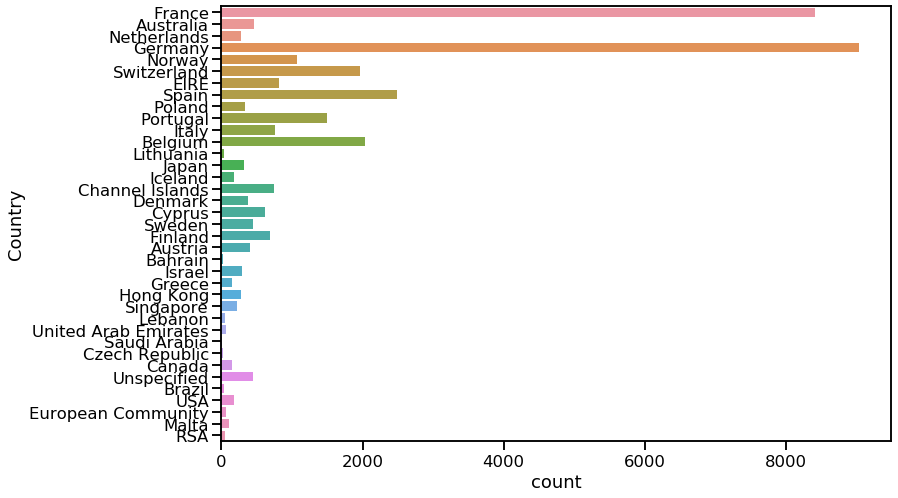

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(y='Country',data=df)
plt.show()

In [8]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [9]:
df = df[df['CustomerID'].notnull()]
df.shape

(33698, 8)

In [10]:
df['CustomerID'] = df['CustomerID'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


In [11]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

df['Sales'].head()

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

In [12]:
df.to_csv('cleaned_transactions.csv',index=None)

# Feature Engineering

In [13]:
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583,France,40.8
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583,France,30.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583,France,53.1
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583,France,70.8
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583,France,46.8


In [14]:
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions':'nunique'})

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [15]:
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [16]:
product_data = df.groupby('CustomerID').StockCode.agg({'total_products':'count',
                                                      'total_unique_products':'nunique'})
product_data.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [17]:
sales_data = df.groupby('CustomerID').Sales.agg({
    'total_sales':'sum',
    'avg_product_value':'mean'
})
sales_data.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [18]:
cart_data = df.groupby(['CustomerID','InvoiceNo']).Sales.agg({'cart_value':'sum'})
cart_data.reset_index(inplace=True)
cart_data.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [19]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({
    'avg_cart_value':'mean',
    'min_cart_value':'min',
    'max_cart_value':'max'
})
agg_cart_data.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


In [20]:
customer_df = invoice_data.join([product_data,sales_data,agg_cart_data])
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [21]:
customer_df.to_csv('analytical_base_table.csv')

In [22]:
item_dummies = pd.get_dummies(df.StockCode)
item_dummies['CustomerID'] = df.CustomerID
item_dummies.head(11)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583


In [23]:
item_dummies.shape

(33698, 2575)

In [24]:
item_data = item_dummies.groupby('CustomerID').sum()
item_data.head(11)

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
12353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
item_data.shape

(414, 2574)

In [26]:
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [27]:
item_data.to_csv('item_data.csv')

In [28]:
item_data.sum().sort_values(ascending=False).head(20)

POST      1055
22326      271
22423      222
22554      197
22556      179
21731      169
22328      166
22629      160
22551      158
21212      143
20725      141
23084      140
20750      132
20719      128
20726      123
85099B     123
21080      122
22139      117
22630      115
22961      114
dtype: int64

In [29]:
top_20_items = item_data.sum().sort_values(ascending=False).head(20).index
top_20_items

Index(['POST', '22326', '22423', '22554', '22556', '21731', '22328', '22629',
       '22551', '21212', '20725', '23084', '20750', '20719', '20726', '85099B',
       '21080', '22139', '22630', '22961'],
      dtype='object')

In [30]:
top_20_item_data = item_data[top_20_items]

top_20_item_data.shape

(414, 20)

In [31]:
top_20_item_data.head(11)

,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
12355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [32]:
top_20_item_data.to_csv('threshold_item_data.csv')

In [33]:
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)
item_data_scaled[:5]

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [34]:
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
PC_items = pca.transform(item_data_scaled)
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  1.41206491e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -6.08887940e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  4.13905021e-15],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05,  3.61169428e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04, -6.89049512e-14]])

In [36]:
pca.explained_variance_ratio_.sum()

1.0

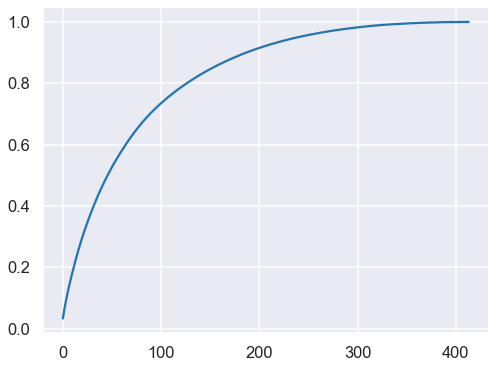

In [37]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.show()

In [38]:
cumulative_explained_variance[124]

0.7955069032205403

In [39]:
pca = PCA(n_components=125)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 125)

In [40]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

items_pca.index = item_data.index

items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828923,-0.495558,3.093855,-0.633703,-11.534094,2.161977,7.117042,5.336000,4.424510,4.636829,2.316522,12.310744,1.986568,-11.431199,5.617852,-2.177362,7.665553,-12.135293,-16.049145,-5.949607,7.813376,40.517546,-35.575271,-17.558233,6.870001,20.887081,2.298241,-26.156982,-32.581402,7.880036,12.362621,6.822114,-32.957377,-4.405600,-17.239261,-11.270468,-14.489517,-2.769068,4.736767,-6.984389,-1.461001,10.602924,1.236773,3.087220,5.334916,-0.410863,1.633949,-6.381786,3.073371,...,-2.321569,2.555720,-0.761727,-1.828518,-1.969521,1.346399,0.499049,-1.163267,-2.259611,-3.416041,0.439300,-1.910097,0.667556,0.305963,1.052249,-2.149233,0.147453,0.293130,-0.587000,0.500579,-0.648926,-0.469506,-0.047507,-0.232340,-0.308377,-0.305376,-1.682243,-0.315885,-0.517060,-0.160473,0.437500,-0.297740,0.689043,1.268398,-0.684572,0.684258,1.243804,0.150098,0.019781,-0.902339,-0.283188,0.637192,-0.426818,-0.425920,0.471726,-0.232134,-0.306414,-0.101831,0.034824,-0.107604
12348,-4.219830,1.226184,-1.881854,-0.174411,0.817801,1.160937,-0.871910,-0.846554,0.460213,0.854240,-0.402237,0.981777,-1.103938,0.770662,-0.093081,-0.313694,-0.448849,1.208033,0.381375,-0.469244,0.186810,0.053728,0.499082,0.372400,1.229409,-0.771207,-0.270423,0.848763,-0.373123,-0.575693,1.013510,-0.577047,0.951419,-0.733254,0.351226,-0.389429,-0.299632,0.396903,0.147993,0.340396,-0.461638,0.704369,1.204920,-0.202935,-0.876383,-0.056216,-0.423244,-1.639009,-0.400437,0.455538,...,1.170062,-0.954836,-0.448212,-0.449134,-0.068260,0.144980,-0.868007,-0.250264,0.632235,0.128717,0.273132,0.090117,-1.756675,0.054931,-0.442204,-0.536737,0.306633,0.833390,-0.856467,0.874562,-0.268991,0.464087,0.864876,-1.501340,0.970595,0.909349,0.161288,-1.926252,0.875867,-0.522819,2.038840,-0.973905,-2.226908,0.372798,-0.191314,-0.353139,-1.858837,-0.585598,-0.791793,0.982856,1.679900,-1.309898,-1.816208,-0.574059,-1.878322,-0.997435,0.050498,0.337919,-0.363316,-2.049011
12349,-1.260843,2.387664,-0.073139,-1.119393,-0.034336,-3.715142,-0.344085,-0.149471,-0.790245,-0.379204,1.568976,0.183397,0.223468,-0.051217,3.180003,-0.511981,-1.839677,0.384047,0.316603,-0.002337,-0.420017,0.454308,-0.789264,1.748796,-1.480917,0.757356,-0.910598,0.771509,0.500514,-1.350196,0.283856,0.669991,0.085079,-0.216594,-0.671736,-1.538844,0.795951,-1.411625,-0.113826,-0.920136,0.102440,-0.105049,-0.154426,0.698740,1.382839,-0.239438,-0.094778,-0.185424,0.862994,1.682375,...,-2.339067,-0.665516,1.643596,0.796268,0.903192,-0.037811,-1.168625,0.526306,1.187498,-0.682243,1.931661,1.354824,-2.749305,-2.580602,0.454397,-1.728052,-2.477123,-1.796140,-0.881855,-2.226286,1.142679,-0.002132,1.519971,-0.917805,-1.348872,0.440558,3.140976,0.632626,-2.057855,0.528913,1.116908,-2.977883,-1.113353,-0.299270,-3.316890,0.740916,-3.168203,-1.591522,0.470939,-0.164777,-4.321587,3.606941,0.546762,-2.161461,0.774895,-1.706239,5.435681,3.113596,0.710427,5.154210
12350,-4.929325,-0.714808,-1.580985,-0.469727,-0.116301,0.647877,0.113030,-1.336525,1.546784,-1.190445,-0.213118,1.057340,-0.475169,0.856193,-1.305382,0.243699,0.268416,1.951860,-0.228004,0.569725,-0.187577,0.904077,1.363662,0.178555,-0.258764,-0.168709,-0.683500,1.082829,-0.154614,-0.400648,0.239027,0.632741,-1.450396,-0.186420,-0.316687,-0.308423,-1.356291,-0.002879,0.581158,-0.257103,0.590155,-0.211312,0.286267,0.519894,-0.535994,-0.104909,-1.474100,0

In [41]:
items_pca.to_csv('pca_item_data.csv')

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [43]:
base_df = pd.read_csv('analytical_base_table.csv',index_col=0)
threshold_item_data = pd.read_csv('threshold_item_data.csv',index_col=0)
pca_item_data =pd.read_csv('pca_item_data.csv',index_col=0)

In [44]:
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


In [45]:
threshold_df = base_df.join(threshold_item_data)
threshold_df.head(10)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12353,1,4,4,89.00,22.250000,89.000000,89.00,89.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12354,1,58,58,1079.40,18.610345,1079.400000,1079.40,1079.40,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
12355,1,13,13,459.40,35.338462,459.400000,459.40,459.40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12356,3,59,53,2811.43,47.651356,937.143333,58.35,2271.62,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [46]:
pca_df = base_df.join(pca_item_data)
pca_df.head(10)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828923,-0.495558,3.093855,-0.633703,-11.534094,2.161977,7.117042,5.336000,4.424510,4.636829,2.316522,12.310744,1.986568,-11.431199,5.617852,-2.177362,7.665553,-12.135293,-16.049145,-5.949607,7.813376,40.517546,-35.575271,-17.558233,6.870001,20.887081,2.298241,-26.156982,-32.581402,7.880036,12.362621,6.822114,-32.957377,-4.405600,-17.239261,-11.270468,-14.489517,-2.769068,4.736767,-6.984389,-1.461001,...,-2.321569,2.555720,-0.761727,-1.828518,-1.969521,1.346399,0.499049,-1.163267,-2.259611,-3.416041,0.439300,-1.910097,0.667556,0.305963,1.052249,-2.149233,0.147453,0.293130,-0.587000,0.500579,-0.648926,-0.469506,-0.047507,-0.232340,-0.308377,-0.305376,-1.682243,-0.315885,-0.517060,-0.160473,0.437500,-0.297740,0.689043,1.268398,-0.684572,0.684258,1.243804,0.150098,0.019781,-0.902339,-0.283188,0.637192,-0.426818,-0.425920,0.471726,-0.232134,-0.306414,-0.101831,0.034824,-0.107604
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219830,1.226184,-1.881854,-0.174411,0.817801,1.160937,-0.871910,-0.846554,0.460213,0.854240,-0.402237,0.981777,-1.103938,0.770662,-0.093081,-0.313694,-0.448849,1.208033,0.381375,-0.469244,0.186810,0.053728,0.499082,0.372400,1.229409,-0.771207,-0.270423,0.848763,-0.373123,-0.575693,1.013510,-0.577047,0.951419,-0.733254,0.351226,-0.389429,-0.299632,0.396903,0.147993,0.340396,-0.461638,0.704369,...,1.170062,-0.954836,-0.448212,-0.449134,-0.068260,0.144980,-0.868007,-0.250264,0.632235,0.128717,0.273132,0.090117,-1.756675,0.054931,-0.442204,-0.536737,0.306633,0.833390,-0.856467,0.874562,-0.268991,0.464087,0.864876,-1.501340,0.970595,0.909349,0.161288,-1.926252,0.875867,-0.522819,2.038840,-0.973905,-2.226908,0.372798,-0.191314,-0.353139,-1.858837,-0.585598,-0.791793,0.982856,1.679900,-1.309898,-1.816208,-0.574059,-1.878322,-0.997435,0.050498,0.337919,-0.363316,-2.049011
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260843,2.387664,-0.073139,-1.119393,-0.034336,-3.715142,-0.344085,-0.149471,-0.790245,-0.379204,1.568976,0.183397,0.223468,-0.051217,3.180003,-0.511981,-1.839677,0.384047,0.316603,-0.002337,-0.420017,0.454308,-0.789264,1.748796,-1.480917,0.757356,-0.910598,0.771509,0.500514,-1.350196,0.283856,0.669991,0.085079,-0.216594,-0.671736,-1.538844,0.795951,-1.411625,-0.113826,-0.920136,0.102440,-0.105049,...,-2.339067,-0.665516,1.643596,0.796268,0.903192,-0.037811,-1.168625,0.526306,1.187498,-0.682243,1.931661,1.354824,-2.749305,-2.580602,0.454397,-1.728052,-2.477123,-1.796140,-0.881855,-2.226286,1.142679,-0.002132,1.519971,-0.917805,-1.348872,0.440558,3.140976,0.632626,-2.057855,0.528913,1.116908,-2.977883,-1.113353,-0.299270,-3.316890,0.740916,-3.168203,-1.591522,0.470939,-0.164777,-4.321587,3.606941,0.546762,-2.161461,0.774895,-1.706239,5.435681,3.113596,0.710427,5.154210
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929325,-0.714808,-1.580985,-0.469727,-0.116301,0.647877,0.113030,-1.336525,1.546784,-1.190445,-0.213118,1.057340,-0.475169,0.856193,-1.305382,0.243699,0.268416,1.951860,-0.228004,0.569725,-0.187577,0.904077,1.363662,0.178555,-0.258764,-0.168709,-0.683500,1.082829,-0.154614,-0.400648,0.239027,0.632741,-1.450396,-0.186420,-0.316687,-0.308423,-1.356291,-0.002879,0.581158,-0.2571

In [47]:
k_means = make_pipeline(StandardScaler(),KMeans(n_clusters=3,random_state=123))

In [48]:
k_means.fit(base_df)

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [49]:
base_df['cluster'] = k_means.predict(base_df)
base_df.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


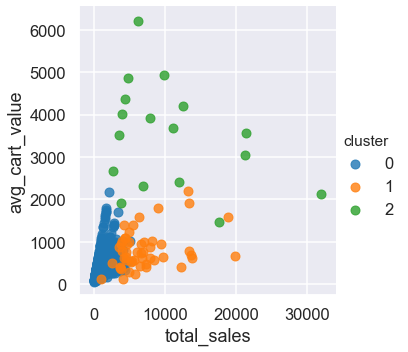

In [50]:
sns.lmplot(x='total_sales',y='avg_cart_value',data=base_df,hue='cluster',fit_reg=False)
plt.show()

In [51]:
kmeans = make_pipeline(StandardScaler(),KMeans(n_clusters=3,random_state=123))
kmeans.fit(threshold_df)

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [52]:
threshold_df['cluster'] = kmeans.predict(threshold_df)
threshold_df.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2


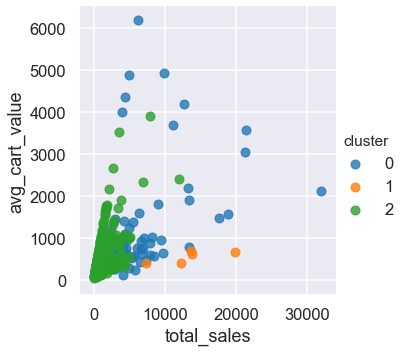

In [53]:
sns.lmplot(x='total_sales',y='avg_cart_value',data=threshold_df,hue='cluster',fit_reg=False)
plt.show()

In [54]:
km = make_pipeline(StandardScaler(),KMeans(n_clusters=3,random_state=123))
km.fit(pca_df)

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [55]:
pca_df['cluster'] = km.predict(pca_df)
pca_df.head()

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828923,-0.495558,3.093855,-0.633703,-11.534094,2.161977,7.117042,5.336000,4.424510,4.636829,2.316522,12.310744,1.986568,-11.431199,5.617852,-2.177362,7.665553,-12.135293,-16.049145,-5.949607,7.813376,40.517546,-35.575271,-17.558233,6.870001,20.887081,2.298241,-26.156982,-32.581402,7.880036,12.362621,6.822114,-32.957377,-4.405600,-17.239261,-11.270468,-14.489517,-2.769068,4.736767,-6.984389,-1.461001,...,2.555720,-0.761727,-1.828518,-1.969521,1.346399,0.499049,-1.163267,-2.259611,-3.416041,0.439300,-1.910097,0.667556,0.305963,1.052249,-2.149233,0.147453,0.293130,-0.587000,0.500579,-0.648926,-0.469506,-0.047507,-0.232340,-0.308377,-0.305376,-1.682243,-0.315885,-0.517060,-0.160473,0.437500,-0.297740,0.689043,1.268398,-0.684572,0.684258,1.243804,0.150098,0.019781,-0.902339,-0.283188,0.637192,-0.426818,-0.425920,0.471726,-0.232134,-0.306414,-0.101831,0.034824,-0.107604,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219830,1.226184,-1.881854,-0.174411,0.817801,1.160937,-0.871910,-0.846554,0.460213,0.854240,-0.402237,0.981777,-1.103938,0.770662,-0.093081,-0.313694,-0.448849,1.208033,0.381375,-0.469244,0.186810,0.053728,0.499082,0.372400,1.229409,-0.771207,-0.270423,0.848763,-0.373123,-0.575693,1.013510,-0.577047,0.951419,-0.733254,0.351226,-0.389429,-0.299632,0.396903,0.147993,0.340396,-0.461638,0.704369,...,-0.954836,-0.448212,-0.449134,-0.068260,0.144980,-0.868007,-0.250264,0.632235,0.128717,0.273132,0.090117,-1.756675,0.054931,-0.442204,-0.536737,0.306633,0.833390,-0.856467,0.874562,-0.268991,0.464087,0.864876,-1.501340,0.970595,0.909349,0.161288,-1.926252,0.875867,-0.522819,2.038840,-0.973905,-2.226908,0.372798,-0.191314,-0.353139,-1.858837,-0.585598,-0.791793,0.982856,1.679900,-1.309898,-1.816208,-0.574059,-1.878322,-0.997435,0.050498,0.337919,-0.363316,-2.049011,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260843,2.387664,-0.073139,-1.119393,-0.034336,-3.715142,-0.344085,-0.149471,-0.790245,-0.379204,1.568976,0.183397,0.223468,-0.051217,3.180003,-0.511981,-1.839677,0.384047,0.316603,-0.002337,-0.420017,0.454308,-0.789264,1.748796,-1.480917,0.757356,-0.910598,0.771509,0.500514,-1.350196,0.283856,0.669991,0.085079,-0.216594,-0.671736,-1.538844,0.795951,-1.411625,-0.113826,-0.920136,0.102440,-0.105049,...,-0.665516,1.643596,0.796268,0.903192,-0.037811,-1.168625,0.526306,1.187498,-0.682243,1.931661,1.354824,-2.749305,-2.580602,0.454397,-1.728052,-2.477123,-1.796140,-0.881855,-2.226286,1.142679,-0.002132,1.519971,-0.917805,-1.348872,0.440558,3.140976,0.632626,-2.057855,0.528913,1.116908,-2.977883,-1.113353,-0.299270,-3.316890,0.740916,-3.168203,-1.591522,0.470939,-0.164777,-4.321587,3.606941,0.546762,-2.161461,0.774895,-1.706239,5.435681,3.113596,0.710427,5.154210,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929325,-0.714808,-1.580985,-0.469727,-0.116301,0.647877,0.113030,-1.336525,1.546784,-1.190445,-0.213118,1.057340,-0.475169,0.856193,-1.305382,0.243699,0.268416,1.951860,-0.228004,0.569725,-0.187577,0.904077,1.363662,0.178555,-0.258764,-0.168709,-0.683500,1.082829,-0.154614,-0.400648,0.239027,0.632741,-1.450396,-0.186420,-0.316687,-0.308423,-1.356291,-0.002879,0.581158,-0.257103,0.590155,-0.21131

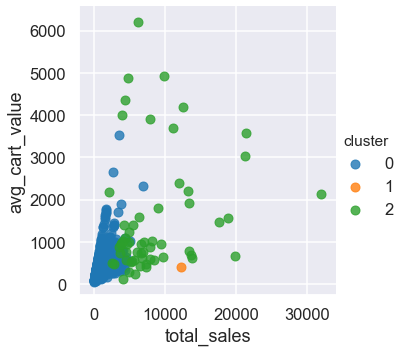

In [56]:
sns.lmplot(x='total_sales',y='avg_cart_value',data=pca_df,hue='cluster',fit_reg=False)
plt.show()

In [57]:
print(all(base_df.index== threshold_df.index))
print(all(base_df.index== pca_df.index))

True
True


In [58]:
from sklearn.metrics import adjusted_rand_score

In [59]:
adjusted_rand_score(base_df['cluster'],threshold_df['cluster'])

0.6021354951782343

In [60]:
adjusted_rand_score(base_df['cluster'],pca_df['cluster'])

0.789453688861035